## **Cars and Bikes Dataset**

- 자동차, 오토바이 이진분류  
https://www.kaggle.com/datasets/devkhant24/cars-and-bikes-prediction

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/car/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(64, 64), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 791 images belonging to 2 classes.
{'Bikes': 0, 'Cars': 1}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'Bikes', 1: 'Cars'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

foot_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
foot_df.file_paths = foot_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
foot_df

file_paths target_names  targets
0    ./datasets/car/original/Bikes/Bikes(train)/141...        Bikes        0
1    ./datasets/car/original/Bikes/Bikes(train)/201...        Bikes        0
2    ./datasets/car/original/Bikes/Bikes(train)/201...        Bikes        0
3    ./datasets/car/original/Bikes/Bikes(train)/45c...        Bikes        0
4    ./datasets/car/original/Bikes/Bikes(train)/Hon...        Bikes        0
..                                                 ...          ...      ...
786  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
787  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
788  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
789  ./datasets/car/original/Cars/Cars(train)/image...         Cars        1
790  ./datasets/car/original/Cars/Cars(train)/luxur...         Cars        1

[791 rows x 3 columns]

In [5]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(foot_df.file_paths, 
                 foot_df.targets, 
                 stratify=foot_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
1    320
0    312
Name: count, dtype: int64
targets
1    80
0    79
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    256
0    249
Name: count, dtype: int64
targets
1    64
0    63
Name: count, dtype: int64
targets
1    80
0    79
Name: count, dtype: int64


In [7]:
train_df = foot_df.iloc[train_images.index].reset_index(drop=True)
validation_df = foot_df.iloc[validation_images.index].reset_index(drop=True)
test_df = foot_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(505, 3)
(127, 3)
(159, 3)


In [8]:
# import shutil
# import os.path

# base_dir = './datasets/car/'


# for filepath in train_df.file_paths:
#     destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [9]:
# import shutil
# import os.path

# base_dir = './datasets/car/'


# for filepath in validation_df.file_paths:
#     destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [10]:
# import shutil
# import os.path

# base_dir = './datasets/car/'


# for filepath in test_df.file_paths:
#     destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [2]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/car/train/'
validation_dir = './datasets/car/validation/'
test_dir = './datasets/car/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [3]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['Bikes', 'Cars']


In [73]:
# # 이미지 별 폴더 안 이미지들의 파일명 변경
# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(train_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(train_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(train_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(validation_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(validation_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(validation_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(test_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(test_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(test_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
train_generator = idg.flow_from_directory(train_dir,
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size=BATCH_SIZE,
                                          class_mode='binary',
                                          shuffle=True)

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
validation_generator = idg.flow_from_directory(validation_dir,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary')

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
test_generator = idg.flow_from_directory(test_dir,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary')

# 각 클랙스의 이름과 인덱스 출력
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 761 images belonging to 2 classes.
Found 127 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
{'Bikes': 0, 'Cars': 1}
{'Bikes': 0, 'Cars': 1}
{'Bikes': 0, 'Cars': 1}


In [5]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'Bikes', 1: 'Cars'}

In [6]:
# 각 타겟의 이름 담을 초기 list 선언
tarin_target_names = []
validation_target_names = []
test_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in train_generator.classes:
    tarin_target_names.append(target_name[target])

for target in validation_generator.classes:
    validation_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(tarin_target_names.__len__(), validation_target_names.__len__(), test_target_names.__len__())

761 127 159


In [7]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': tarin_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': validation_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(train_df)
display(validation_df)
display(test_df)

file_paths target_names  targets
0                ./datasets/car/train/Bikes/Bikes1.png        Bikes        0
1               ./datasets/car/train/Bikes/Bikes10.png        Bikes        0
2              ./datasets/car/train/Bikes/Bikes100.png        Bikes        0
3              ./datasets/car/train/Bikes/Bikes101.png        Bikes        0
4              ./datasets/car/train/Bikes/Bikes102.png        Bikes        0
..                                                 ...          ...      ...
756  ./datasets/car/train/Cars/Cars1.png/images - 2...         Cars        1
757  ./datasets/car/train/Cars/Cars1.png/images - 2...         Cars        1
758  ./datasets/car/train/Cars/Cars1.png/images - 2...         Cars        1
759     ./datasets/car/train/Cars/Cars1.png/images.jpg         Cars        1
760  ./datasets/car/train/Cars/Cars1.png/luxury-car...         Cars        1

[761 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/car/validation/Bikes/Bikes1.png        Bikes        0
1    ./datasets/car/validation/Bikes/Bikes10.png        Bikes        0
2    ./datasets/car/validation/Bikes/Bikes11.png        Bikes        0
3    ./datasets/car/validation/Bikes/Bikes12.png        Bikes        0
4    ./datasets/car/validation/Bikes/Bikes13.png        Bikes        0
..                                           ...          ...      ...
122    ./datasets/car/validation/Cars/Cars63.png         Cars        1
123    ./datasets/car/validation/Cars/Cars64.png         Cars        1
124     ./datasets/car/validation/Cars/Cars7.png         Cars        1
125     ./datasets/car/validation/Cars/Cars8.png         Cars        1
126     ./datasets/car/validation/Cars/Cars9.png         Cars        1

[127 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/car/test/Bikes/Bikes1.png        Bikes        0
1    ./datasets/car/test/Bikes/Bikes10.png        Bikes        0
2    ./datasets/car/test/Bikes/Bikes11.png        Bikes        0
3    ./datasets/car/test/Bikes/Bikes12.png        Bikes        0
4    ./datasets/car/test/Bikes/Bikes13.png        Bikes        0
..                                     ...          ...      ...
154    ./datasets/car/test/Cars/Cars78.png         Cars        1
155    ./datasets/car/test/Cars/Cars79.png         Cars        1
156     ./datasets/car/test/Cars/Cars8.png         Cars        1
157    ./datasets/car/test/Cars/Cars80.png         Cars        1
158     ./datasets/car/test/Cars/Cars9.png         Cars        1

[159 rows x 3 columns]

In [18]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(505, 3)
(127, 3)
(159, 3)


## **사전훈련모델별 유사도 예측**

In [9]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [10]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [11]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [12]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=2, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [24]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17328\1732152726.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))


In [25]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(2, 244, 244, 3) (2, 2)


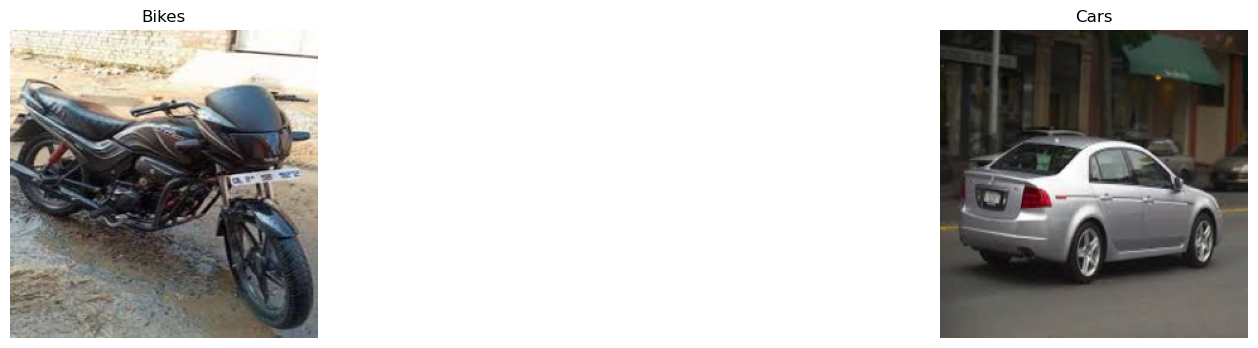

In [26]:
# # 타겟 비중
# print(test_df.groupby(by=['target_names', 'targets']).count())

# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=2, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
[[('n03785016', 'moped', 0.53007996), ('n03791053', 'motor_scooter', 0.22470932), ('n04482393', 'tricycle', 0.091335565), ('n03777568', 'Model_T', 0.04068256), ('n02797295', 'barrow', 0.040467415)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[('n02930766', 'cab', 0.2718765), ('n04285008', 'sports_car', 0.09859866), ('n02814533', 'beach_wagon', 0.09577352), ('n03670208', 'limousine', 0.08125938), ('n04461696', 'tow_truck', 0.054749086)]]


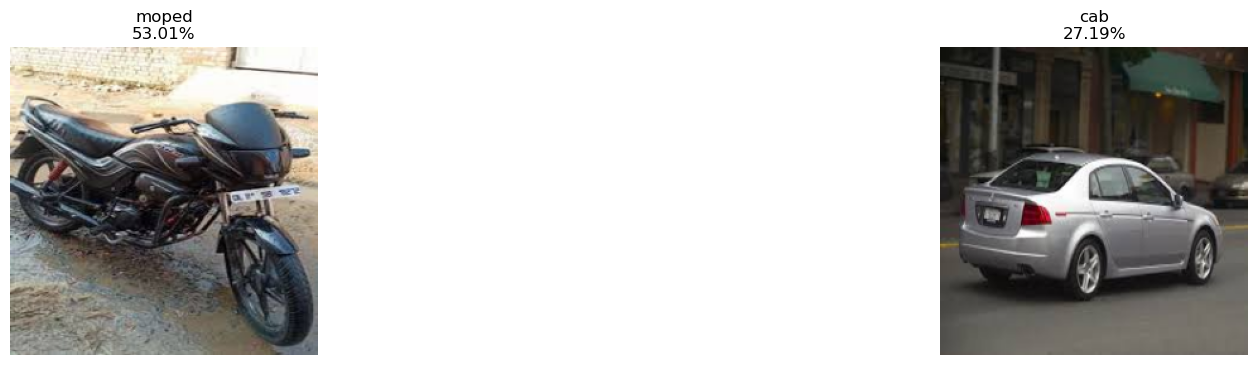

In [27]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n07613480', 'trifle', 0.7650727), ('n02089973', 'English_foxhound', 0.23492733), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[('n02089973', 'English_foxhound', 0.9999994), ('n07613480', 'trifle', 5.397828e-07), ('n02356798', 'fox_squirrel', 3.4150242e-20), ('n01855032', 'red-breasted_merganser', 3.1006846e-28), ('n02105056', 'groenendael', 3.3580776e-29)]]


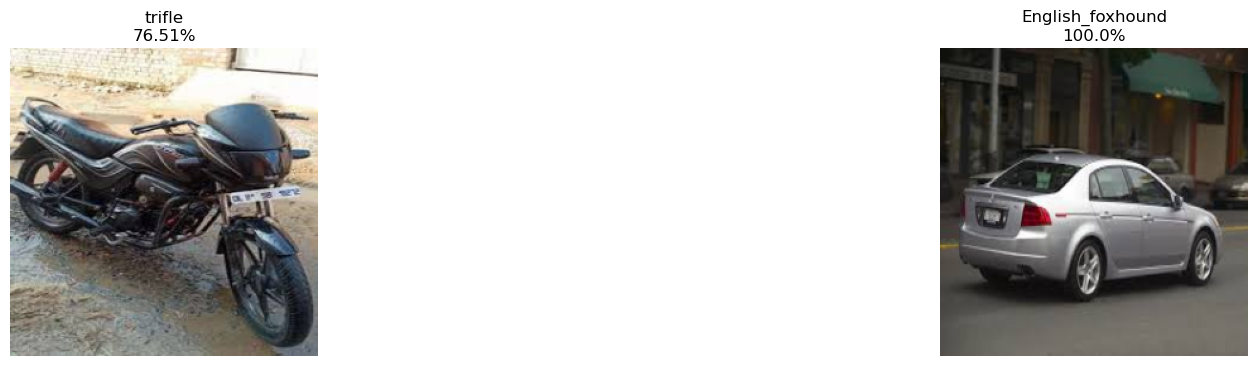

In [28]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03775546', 'mixing_bowl', 0.97782075), ('n03942813', 'ping-pong_ball', 0.022179212), ('n03445777', 'golf_ball', 2.9746727e-10), ('n03814906', 'necklace', 2.3096533e-10), ('n03291819', 'envelope', 1.396202e-10)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[('n03775546', 'mixing_bowl', 0.9996145), ('n04127249', 'safety_pin', 0.0003841507), ('n02443484', 'black-footed_ferret', 8.852351e-07), ('n03445777', 'golf_ball', 4.8946293e-07), ('n03942813', 'ping-pong_ball', 3.4940414e-10)]]


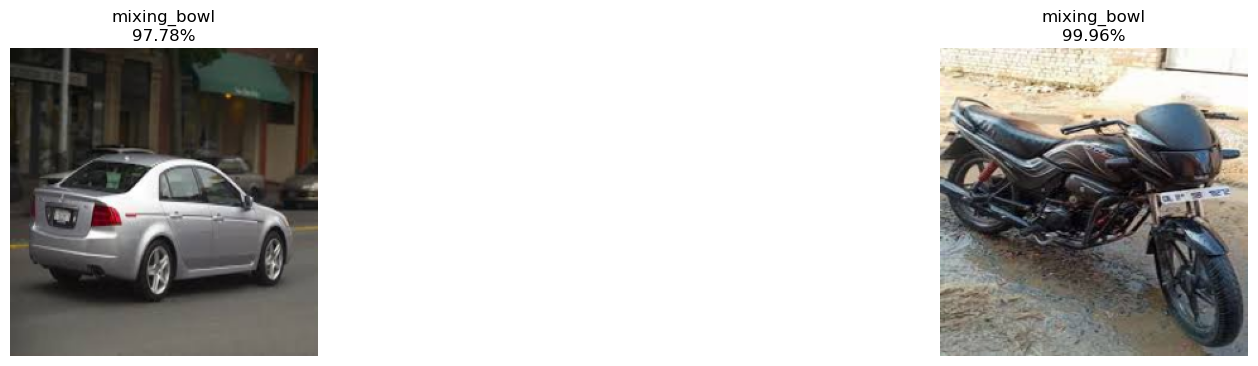

In [29]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03938244', 'pillow', 0.7973246), ('n04209239', 'shower_curtain', 0.16933946), ('n03485794', 'handkerchief', 0.0062634163), ('n04033995', 'quilt', 0.0040963707), ('n04548362', 'wallet', 0.0029690906)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[('n04209239', 'shower_curtain', 0.5003932), ('n03938244', 'pillow', 0.29106036), ('n04033995', 'quilt', 0.03619523), ('n04548362', 'wallet', 0.024971781), ('n03291819', 'envelope', 0.016216272)]]


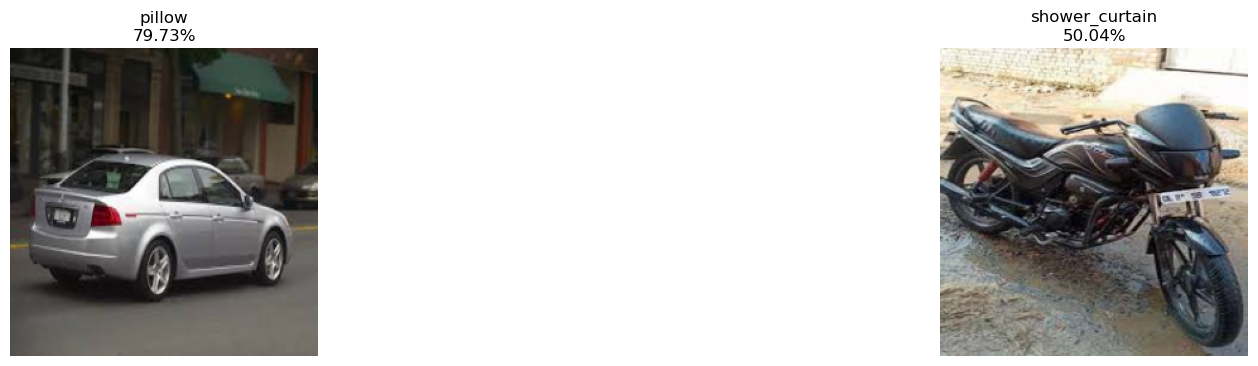

In [30]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

## **VGG16**

## **1Cycle**

- vgg16 모델이 bike를 'moped'로, cars를 'cab'으로 컬럼과 같은 정답을 출력하였으므로 유사도가 높은 모델이라고 판단하였습니다.  
- vgg16 모델로 학습을 진행합니다.  
> image size = 64  
> batch size = 64  
> epoch = 10

- **train acc: 0.9982, val_acc: 0.6772, test acc: 0.6981** 으로 결과는 아래의 그래프와 같습니다.
- 과적합이라고 판단하였습니다.

<img src='./images/car_1cycle.png' width='500px'>

In [14]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [52]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
# aug = A.Compose([
#     A.ShiftScaleRotate(p=0.5),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
# ])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        # aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [54]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [55]:
import gc

# 메모리 해제 함수
gc.collect()

71243

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [56]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - acc: 0.5120 - loss: 1.0472 - val_acc: 0.5039 - val_loss: 17.5806 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 949ms/step - acc: 0.7928 - loss: 0.5471 - val_acc: 0.4646 - val_loss: 14.7513 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 934ms/step - acc: 0.9066 - loss: 0.2385 - val_acc: 0.5039 - val_loss: 14.5258 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 928ms/step - acc: 0.9767 - loss: 0.0771 - val_acc: 0.5039 - val_loss: 10.7140 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 931ms/step - acc: 0.9981 - loss: 0.0269 - val_acc: 0.5039 - val_loss: 9.6877 - learning_rate: 0.0010
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 936ms/step - acc: 0.9931 - loss: 0.0373 - val_acc: 0.5039 - val_loss: 18.1649 - learning_rate: 0.0010
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 938ms/step - acc: 0.9906 - loss: 0.0322 - val_acc: 0.5039 - val_loss: 15.3453 - learning_rate: 0.0010
Epoch 8/10
8/8 ━━━━━━━━━━━━

In [57]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - acc: 0.5991 - loss: 6.4491


[4.704944133758545, 0.698113203048706]

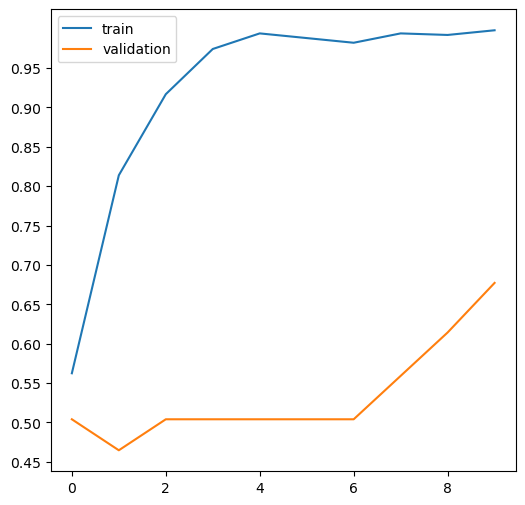

In [59]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

## **2Cycle**

- 해당 데이터는 791개의 저용량 데이터입니다.  
- 데이터 부족이라 판단하여 augmentation을 사용하여 이미지 증강으로 학습을 진행합니다.  
> image size = 64  
> batch size = 64  
> epoch = 10  
> augmentation = ShiftScaleRotate(회전) , HorizontalFlip(수평반전), RandomBrightnessContrast(밝기대비)

- 1cycle 결과 **train acc: 0.9982, val_acc: 0.6772, test acc: 0.6981**  
- 2cycle 결과 **train acc: 0.9618, val_acc: 0.8346, test acc: 0.7358**  

- 전보다 과적합이 조금 해소된 결과를 보여줍니다.

<img src='./images/car_2cycle.png' width='500px'>

In [64]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [65]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [66]:
import gc

# 메모리 해제 함수
gc.collect()

39519

In [67]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - acc: 0.5548 - loss: 1.0036 - val_acc: 0.4961 - val_loss: 18.1949 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 954ms/step - acc: 0.8126 - loss: 0.5069 - val_acc: 0.5433 - val_loss: 4.3137 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 956ms/step - acc: 0.9168 - loss: 0.2822 - val_acc: 0.7480 - val_loss: 0.9157 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 979ms/step - acc: 0.9337 - loss: 0.1757 - val_acc: 0.7638 - val_loss: 1.3888 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 976ms/step - acc: 0.9074 - loss: 0.2431 - val_acc: 0.5118 - val_loss: 16.1036 - learning_rate: 0.0010
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 973ms/step - acc: 0.9499 - loss: 0.1368 - val_acc: 0.6457 - val_loss: 5.2202 - learning_rate: 1.0000e-04
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 972ms/step - acc: 0.9618 - loss: 0.0966 - val_acc: 0.8346 - val_loss: 1.3068 - learning_rate: 1.0000e-04


In [68]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - acc: 0.7898 - loss: 1.5346


[2.123861312866211, 0.7358490824699402]

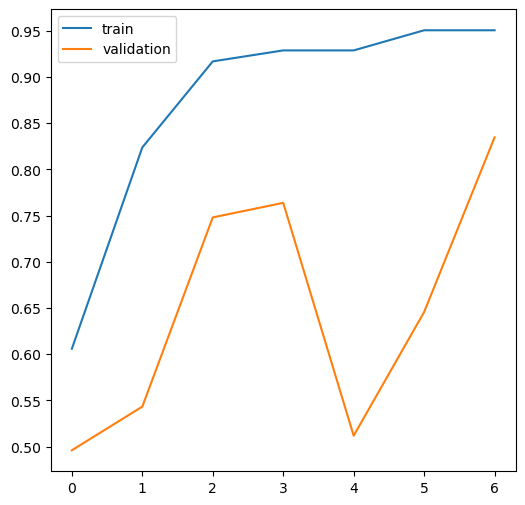

In [69]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

## **3Cycle**

-  augmentation을 사용하여 이미지 증강으로 학습을 진행했을 때 수치가 상승했습니다.  
-  이미지 증강을 강화하여 더 다양성을 높은 데이터로 모델이 일반화 될 수 있게 해줍니다.
  
> image size = 64  
> batch size = 64  
> epoch = 10  
> augmentation = ShiftScaleRotate(회전) , HorizontalFlip(수평반전), RandomBrightnessContrast(밝기대비), GaussNoise(노이즈), Normalize(정규화)
 
- 2cycle 결과 **train acc: 0.9618, val_acc: 0.8346, test acc: 0.7358**  
- 3cycle 결과 **train acc: 0.9561, val_acc: 0.5039, test acc: 0.6358**  

- 검증 정확도가 학습 내내 0.5039로 거의 랜덤으로 맞추는 확률을 보여줍니다.  

In [91]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [92]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [93]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [94]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [95]:
import gc

# 메모리 해제 함수
gc.collect()

10675

In [96]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - acc: 0.6689 - loss: 0.6308 - val_acc: 0.5039 - val_loss: 61.6143 - learning_rate: 0.0010
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9260 - loss: 0.2185 - val_acc: 0.5039 - val_loss: 80.7108 - learning_rate: 0.0010
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9567 - loss: 0.1522 - val_acc: 0.5039 - val_loss: 242.3534 - learning_rate: 0.0010
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9686 - loss: 0.1115 - val_acc: 0.5039 - val_loss: 222.5801 - learning_rate: 0.0010
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9561 - loss: 0.1292 - val_acc: 0.5039 - val_loss: 387.0916 - learning_rate: 0.0010


## **4Cycle**

-  이미지 증강을 강화하면서 과적합이 심해졌다고 판단하여 규제를 통해 과적합을 해소합니다.  
  
> image size = 64  
> batch size = 64  
> epoch = 10  
> augmentation = ShiftScaleRotate(회전) , HorizontalFlip(수평반전), RandomBrightnessContrast(밝기대비), GaussNoise(노이즈), Normalize(정규화)  
  
- 3cycle 결과 **train acc: 0.9561, val_acc: 0.5039, test acc: 0.6358**  
- 4cycle 결과 **train acc: 0.9626, val_acc: 0.8976, test acc: 0.8930**

<img src='./images/car_4cycle.png' width='500px'> 

- 마지막 수치를 봤을 때 과적합이 많이 해소됐지만, 여전히 차이가 있고 
- 실제 이미지를 주었을 때 오답률이 있습니다.  

<img src='./images/car_4cycle_bikes.png' width='300px'> <img src='./images/car_4cycle_cars.png' width='400px'>

In [97]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [98]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model 

In [99]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [100]:
import gc

# 메모리 해제 함수
gc.collect()

48657

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [102]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.7374 - loss: 0.6323 - val_acc: 0.5039 - val_loss: 183.5398 - learning_rate: 0.0010
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9074 - loss: 0.2657 - val_acc: 0.5039 - val_loss: 125.6046 - learning_rate: 0.0010
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9292 - loss: 0.1769 - val_acc: 0.5039 - val_loss: 187.7758 - learning_rate: 0.0010
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9471 - loss: 0.1577 - val_acc: 0.5039 - val_loss: 56.3594 - learning_rate: 0.0010
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9726 - loss: 0.1040 - val_acc: 0.5118 - val_loss: 54.9495 - learning_rate: 0.0010
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9755 - loss: 0.1106 - val_acc: 0.5039 - val_loss: 85.6312 - learning_rate: 0.0010
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9791 - loss: 0.0881 - val_acc: 0.5197 - val_loss: 90.1291 - learning_rate: 0.0010
Epoch 8/10

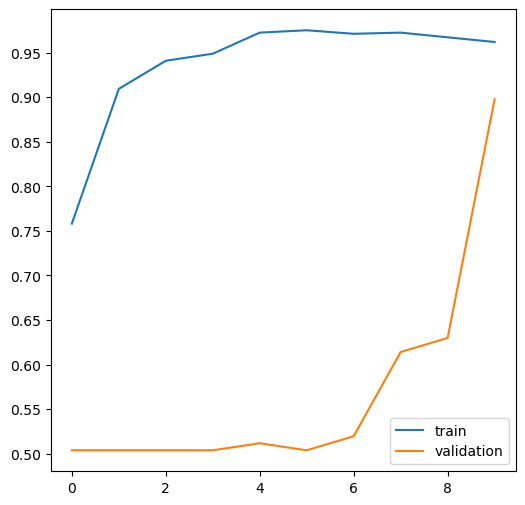

In [103]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [104]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - acc: 0.8587 - loss: 1.4738


[1.1557683944702148, 0.893081784248352]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


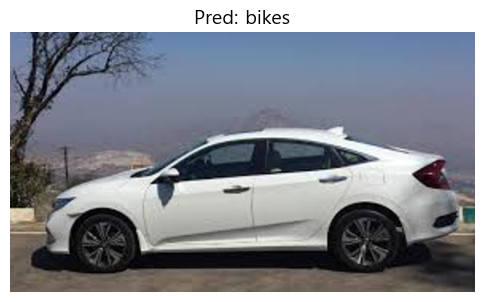

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

# 클래스 이름 정의
CLASS_NAMES = ['bikes', 'cars']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    # plt.title(f'Real: {CLASS_NAMES[target]}\nPred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/car_cars.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=xception_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


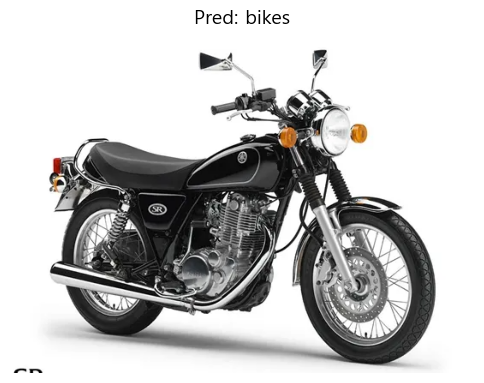

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

# 클래스 이름 정의
CLASS_NAMES = ['bikes', 'cars']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    # plt.title(f'Real: {CLASS_NAMES[target]}\nPred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/car_bikes.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=xception_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

## **5Cycle**

-  모델에 compile 할 때, Adam 에 러닝레이트를 0.01부터 조금씩 줄여가봅니다.
-  러닝레이트 0.00001 일 때 성능이 가장 좋습니다.  
  
> image size = 64  
> batch size = 64  
> epoch = 10  
> augmentation = ShiftScaleRotate(회전) , HorizontalFlip(수평반전), RandomBrightnessContrast(밝기대비), GaussNoise(노이즈), Normalize(정규화)  
> 

- 4cycle 결과 **train acc: 0.9626, val_acc: 0.8976, test acc: 0.8930**
- 5cycle 결과 **train acc: 0.9910, val_acc: 0.9921, test acc: 0.9622**

<img src='./images/car_5cycle.png' width='500px'> 

- 실제 이미지를 주었을 때 여전히 오답률이 있습니다.  

<img src='./images/car_5cycle_bikes.png' width='300px'> <img src='./images/car_5cycle_cars.png' width='400px'>

In [18]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [22]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [23]:
import gc

# 메모리 해제 함수
gc.collect()

1385

In [24]:
N_EPOCHS = 20

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.4088 - loss: 1.3553 - val_acc: 0.5906 - val_loss: 1.1505 - learning_rate: 1.0000e-04
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 998ms/step - acc: 0.5361 - loss: 0.8899 - val_acc: 0.6457 - val_loss: 0.8991 - learning_rate: 1.0000e-04
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 994ms/step - acc: 0.6338 - loss: 0.6845 - val_acc: 0.7087 - val_loss: 0.6134 - learning_rate: 1.0000e-04
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 988ms/step - acc: 0.6975 - loss: 0.6061 - val_acc: 0.8031 - val_loss: 0.4840 - learning_rate: 1.0000e-04
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 984ms/step - acc: 0.7585 - loss: 0.4983 - val_acc: 0.8425 - val_loss: 0.3937 - learning_rate: 1.0000e-04
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 999ms/step - acc: 0.7563 - loss: 0.4784 - val_acc: 0.8740 - val_loss: 0.3156 - learning_rate: 1.0000e-04
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 989ms/step - acc: 0.8405 - loss: 0.3634 - val_acc: 0.8898 - val_loss: 0.2611 - learning_ra

In [25]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - acc: 0.9518 - loss: 0.3001


[0.22298316657543182, 0.9622641801834106]

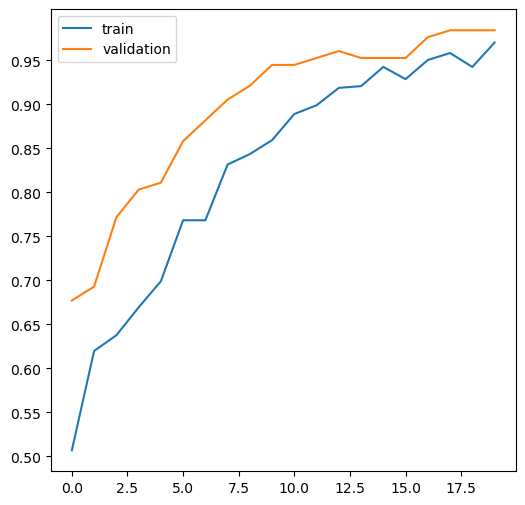

In [225]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


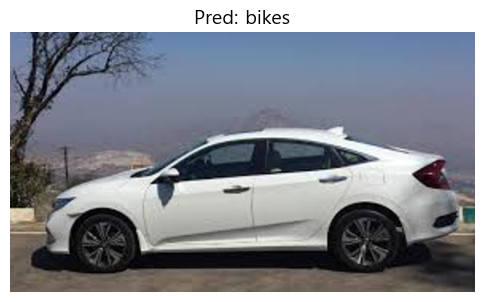

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

# 클래스 이름 정의
CLASS_NAMES = ['bikes', 'cars']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    # plt.title(f'Real: {CLASS_NAMES[target]}\nPred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/car_cars.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=xception_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


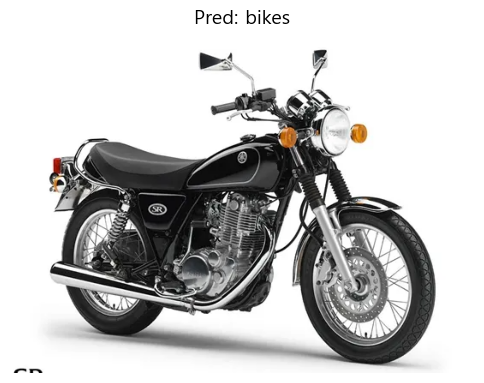

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

# 클래스 이름 정의
CLASS_NAMES = ['bikes', 'cars']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    # plt.title(f'Real: {CLASS_NAMES[target]}\nPred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/car_bikes.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=xception_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

## **6Cycle**

-  이미지 사이즈를 조정하여 학습에 적절한 이미지 크기를 찾아봅니다.   
  
> image size = 150  
> batch size = 64  
> epoch = 10  
> augmentation = ShiftScaleRotate(회전) , HorizontalFlip(수평반전), RandomBrightnessContrast(밝기대비), GaussNoise(노이즈), Normalize(정규화)  
> 

- 5cycle 결과 **train acc: 0.9910, val_acc: 0.9921, test acc: 0.9622**
- 6cycle 결과 **train acc: 0.9823, val_acc: 0.9764, test acc: 0.9433**

<img src='./images/car_5cycle.png' width='500px'> 

- 못 맞추던 이미지도 잘 맞추는 결과를 보여줍니다.  

<img src='./images/car_6cycle_bikes.png' width='300px'> <img src='./images/car_6cycle_cars.png' width='400px'>

In [49]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 150
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [76]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
# train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
# validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
# test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
    A.GaussNoise(p=0.2),
    # 이미지에 랜덤 가우시안 노이즈 추가 (확률 20%)
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # # 이미지 정규화 (각 채널별 평균과 표준편차로 정규화)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [75]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [72]:
import gc

# 메모리 해제 함수
gc.collect()

133719

In [77]:
N_EPOCHS = 20

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - acc: 0.5865 - loss: 0.7964 - val_acc: 0.6929 - val_loss: 0.8167 - learning_rate: 1.0000e-04
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - acc: 0.9111 - loss: 0.2487 - val_acc: 0.7559 - val_loss: 0.7499 - learning_rate: 1.0000e-04
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - acc: 0.9404 - loss: 0.1763 - val_acc: 0.9055 - val_loss: 0.3001 - learning_rate: 1.0000e-04
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - acc: 0.9823 - loss: 0.0806 - val_acc: 0.9764 - val_loss: 0.0378 - learning_rate: 1.0000e-04


In [55]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 784ms/step - acc: 0.9229 - loss: 0.4875


[0.35338321328163147, 0.9433962106704712]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1


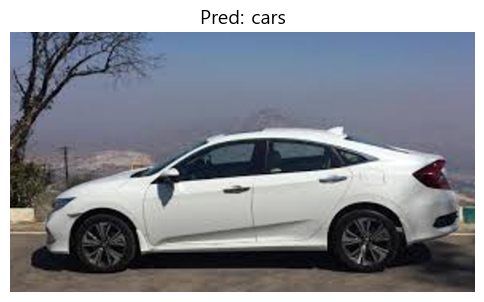

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 정의
CLASS_NAMES = ['bikes', 'cars']

# 이미지 크기 설정
IMAGE_SIZE = 150

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    # plt.title(f'Real: {CLASS_NAMES[target]}\nPred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/car_cars.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]
predicted_class = int(pred_probas[0][0] > 0.5)
print(predicted_class)

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=predicted_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
0


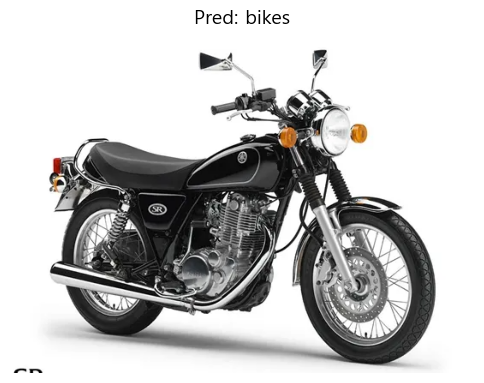

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 정의
CLASS_NAMES = ['bikes', 'cars']

# 이미지 크기 설정
IMAGE_SIZE = 150

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    # plt.title(f'Real: {CLASS_NAMES[target]}\nPred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/car_bikes.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]
predicted_class = int(pred_probas[0][0] > 0.5)
print(predicted_class)

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=predicted_class, fontsize=14)